# Investigating a dataset (Soccer Database)

The source of the database: [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/hugomathien/soccer&sa=D&source=editors&ust=1687000265125059&usg=AOvVaw32Vag4trATrJCq3v6hTMET)

### Introduction


The ultimate Soccer database, available on Kaggle, offers a wealth of data for data analysis and machine learning in the realm of soccer. This comprehensive dataset encompasses over 25,000 matches and more than 10,000 players. It covers 11 European countries, including their leading championships, spanning the seasons from 2008 to 2016. The players' and teams' attributes are sourced from EA Sports' FIFA video game series, which includes weekly updates to ensure accuracy and relevance. Additionally, the database includes team lineups with squad formations, indicated by X and Y coordinates. Betting odds from up to 10 providers are provided, allowing for in-depth analysis of the gambling aspect of soccer. Furthermore, detailed match events, such as goal types, possession statistics, corner kicks, crosses, fouls, and cards, are documented for over 10,000 matches. This dataset from Kaggle serves as a valuable resource for soccer enthusiasts, researchers, and data scientists looking to explore and uncover insights in the world of soccer using advanced analytical techniques and machine learning algorithms.

A brief introduction about each table in the database:
* **Match Table**:
The Match table contains information about individual matches. It includes data such as the date and time of the match, the home team and away team IDs, the final score, and other relevant details.

* **Player Table**:
The Player table holds information about various players. It includes attributes like player IDs, names, birthdates, and other personal details. This table allows you to track and analyze individual player data across different matches.

* **Player Attributes Table**:
The Player Attributes table contains detailed attributes and statistics for each player in the Player table. It includes information such as player ratings, skills, preferred positions, physical attributes, and other performance-related data. This table provides insights into the strengths and weaknesses of individual players.

* **Team Table**:
The Team table stores information about different teams participating in matches. It includes attributes like team IDs, names, and other details specific to each team. This table allows you to analyze team performance and track the progress of different teams over time.

* **Team Attributes Table**:
The Team Attributes table holds additional information about the teams in the Team table. It includes data such as team ratings, formations, playing styles, and other characteristics that define each team's strategy and playing approach. This table helps in understanding the unique qualities and dynamics of each team.

* **Country Table**:
The Country table contains information about different countries represented in the matches. It includes country IDs, names. This table enables you to analyze matches and teams based on their country of origin.

* **League Table**:
The League table stores data related to different leagues or competitions in which matches are played. It includes league IDs, names This table helps in categorizing and organizing matches based on the specific league they belong to.

### Asking Questions

* What is the biggest goal difference in a single match?
* Among the players with high attacking rate, what is the relationship between dribbling rate and overall rate?
* What is the number of unique teams for each country and which country has the biggest number of teams participated in these matches?
* Do teams tend to score more goals when they play at home?
* For each country, what is the team with the highest number of wins?

### Importing Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

### Importing data

Establishing a connection between the SQLite database and Jupyter Notebook and craeting a cursor object:

In [2]:
# Change the path depending on where you store the database
conn = sqlite3.connect('database.sqlite')

In [3]:
c= conn.cursor()

Extracting the names of the tables in the database through a query and adding them to a list to use them later as arguments in a function:

In [4]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
a=c.fetchall()
tables_names= [i[0]for i in a]
tables_names

['sqlite_sequence',
 'Player_Attributes',
 'Player',
 'Match',
 'League',
 'Country',
 'Team',
 'Team_Attributes']

Creating a function to transform the database tables to data frames and creating a list of their names:

In [5]:
def get_tables_to_df(cursor_object,tables):
    """
    Description: This function retrieves data from database tables specified in the 
        tables list using a cursor object and converts them into Pandas DataFrames. 
        It also assigns variable names to the DataFrames.
    
    Parameters:
        cursor_object (cursor): A database cursor object for executing SQL queries.
        tables (list): A list of table names from which data will be retrieved.

    Returns:
        listofdfs (list): A list of Pandas DataFrames containing the retrieved data from each table.
        var_names (list): A list of variable names assigned to the DataFrames.
        
    """
    listofdfs=[]
    var_names = []
    b={}
    for x in tables:
        a=cursor_object.execute("select * from {}".format(x))
        names = [description[0] for description in cursor_object.description]
        b=a.fetchall()
        df=pd.DataFrame(b,columns=names)
        b.clear()
        listofdfs.append(df)
       
        df_name = "df_{}".format(x)  # Generate a variable name
        globals()[df_name] = df 
        var_names.append(df_name)
    return listofdfs,var_names
        
        
        
        
    
    

Calling the get_tables_to_df function in order to get the list of dataframes and the list of names:

In [6]:
my_dfs,my_names = get_tables_to_df(c, tables_names)

Creating a function to assign the names to its representitive dataframes:

In [7]:
def assign_names_to_dataframes(names, dataframes):
    """
    Description: This function creates a dictionary to associate names with DataFrames.

    Parameters:
        names (list): A list of names to be assigned to the DataFrames.
        dataframes (list): A list of Pandas DataFrames to be associated with the names.

    Returns:
        name_to_dataframe (dict): A dictionary where each name is associated with its respective DataFrame.
    """
    name_to_dataframe = {}

    for name, df in zip(names, dataframes):
        name_to_dataframe[name] = df

    return name_to_dataframe

In [8]:
name_to_dataframe = assign_names_to_dataframes(my_names, my_dfs)


Extracting the keys of the dictionary:

In [9]:
name_to_dataframe.keys()


dict_keys(['df_sqlite_sequence', 'df_Player_Attributes', 'df_Player', 'df_Match', 'df_League', 'df_Country', 'df_Team', 'df_Team_Attributes'])

Assigning each dataframe to a variable:

In [10]:
df_country=name_to_dataframe['df_Country']
df_sqlite_sequence=name_to_dataframe['df_sqlite_sequence']
df_player_attributes=name_to_dataframe['df_Player_Attributes']
df_player=name_to_dataframe['df_Player']
df_match=name_to_dataframe['df_Match']
df_league=name_to_dataframe['df_League']
df_team=name_to_dataframe['df_Team']
df_team_attributes=name_to_dataframe['df_Team_Attributes']



### Data Organizing

Discovering the data:

In [11]:
df_country.head(1)

,id,name
0,1,Belgium


In [12]:
df_league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [13]:
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [14]:
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [15]:
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [16]:
df_player_attributes.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [17]:
df_team_attributes.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


Now we want to merge and clean the datasets:

Merging df_country with df_league:

In [18]:
df_country_league=pd.merge(df_country,df_league,left_on='id',right_on="country_id",suffixes=['_country','_league'])
df_country_league.drop(columns=['id_country','id_league'],inplace=True)
df_country_league=df_country_league[['country_id','name_country','name_league']]
df_country_league

,country_id,name_country,name_league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


Extracting the important columns from the df_match dataframe:

In [19]:
df_match=df_match[['id','country_id','season','stage','date','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]
df_match=df_match.merge(df_country_league,on='country_id')
df_match=pd.merge(df_match,df_team,left_on='home_team_api_id',right_on='team_api_id').merge(df_team,left_on='away_team_api_id',right_on='team_api_id',suffixes=['_home','_away'])
df_match=df_match[['season','stage','date','name_country','name_league','team_long_name_home','team_short_name_home','team_long_name_away','team_short_name_away','home_team_goal','away_team_goal','team_fifa_api_id_home','team_fifa_api_id_away']]


df_match.head(3)

,season,stage,date,name_country,name_league,team_long_name_home,team_short_name_home,team_long_name_away,team_short_name_away,home_team_goal,away_team_goal,team_fifa_api_id_home,team_fifa_api_id_away
0,2008/2009,1,2008-08-17 00:00:00,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,1,1,673.0,675.0
1,2009/2010,5,2009-08-30 00:00:00,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,1,1,673.0,675.0
2,2010/2011,1,2010-08-01 00:00:00,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,2,1,673.0,675.0


Merging df_player and df_player_attributes to simplify the number of datasets used in the analysis:

In [20]:
df_player_info=pd.merge(df_player,df_player_attributes, left_on =['player_api_id','player_fifa_api_id'],right_on=['player_api_id','player_fifa_api_id'])
df_player_info.drop(columns=['id_x','id_y'],inplace=True)
df_player_info.sort_values(by=['player_api_id','date'],ascending=[True,True],inplace=True)
df_player_info.reset_index(drop=True,inplace=True)
df_player_info.head(4)


,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154,2007-02-22 00:00:00,63.0,64.0,right,high,medium,48.0,48.0,47.0,64.0,38.0,57.0,50.0,46.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,14.0,11.0,67.0,9.0,10.0
1,2625,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154,2007-08-30 00:00:00,63.0,64.0,right,high,medium,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,14.0,24.0,67.0,24.0,24.0
2,2625,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154,2008-08-30 00:00:00,60.0,64.0,right,high,medium,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,14.0,24.0,67.0,24.0,24.0
3,2625,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154,2010-08-30 00:00:00,60.0,64.0,right,high,medium,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,50.0,49.0,71.0,56.0,78.0,56.0,59.0,72.0,71.0,50.0,56.0,69.0,64.0,66.0,63.0,12.0,11.0,6.0,8.0,8.0


Now creating a new dataframe for the teams information:

In [21]:
df_team_info=df_team.merge(df_team_attributes,on=['team_api_id','team_fifa_api_id'])
df_team_info.drop(columns=['id_x','id_y'],inplace=True)

In [22]:
df_team_info.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,673.0,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,673.0,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,NaN,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,673.0,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,NaN,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,673.0,KRC Genk,GEN,2013-09-20 00:00:00,58,Balanced,NaN,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,9987,673.0,KRC Genk,GEN,2014-09-19 00:00:00,58,Balanced,52.0,Normal,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


Now we have three datasets to deal with:
* df_match
* df_player_info
* df_team_info

### Data Assessing and Cleaning

Now we will assess and clean df_match:

In [23]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 25979 non-null  object 
 1   stage                  25979 non-null  int64  
 2   date                   25979 non-null  object 
 3   name_country           25979 non-null  object 
 4   name_league            25979 non-null  object 
 5   team_long_name_home    25979 non-null  object 
 6   team_short_name_home   25979 non-null  object 
 7   team_long_name_away    25979 non-null  object 
 8   team_short_name_away   25979 non-null  object 
 9   home_team_goal         25979 non-null  int64  
 10  away_team_goal         25979 non-null  int64  
 11  team_fifa_api_id_home  25801 non-null  float64
 12  team_fifa_api_id_away  25801 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.8+ MB


We can remove rows with null values:

In [24]:
df_match.dropna(inplace=True)
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25629 entries, 0 to 25976
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 25629 non-null  object 
 1   stage                  25629 non-null  int64  
 2   date                   25629 non-null  object 
 3   name_country           25629 non-null  object 
 4   name_league            25629 non-null  object 
 5   team_long_name_home    25629 non-null  object 
 6   team_short_name_home   25629 non-null  object 
 7   team_long_name_away    25629 non-null  object 
 8   team_short_name_away   25629 non-null  object 
 9   home_team_goal         25629 non-null  int64  
 10  away_team_goal         25629 non-null  int64  
 11  team_fifa_api_id_home  25629 non-null  float64
 12  team_fifa_api_id_away  25629 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.7+ MB


In [25]:
df_match.describe()

,stage,home_team_goal,away_team_goal,team_fifa_api_id_home,team_fifa_api_id_away
count,25629.000000,25629.000000,25629.000000,25629.000000,25629.000000
mean,18.262905,1.544344,1.160950,15828.306411,15827.562293
std,10.418001,1.297168,1.141179,37320.567878,37318.772780
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,9.000000,1.000000,0.000000,80.000000,80.000000
50%,18.000000,1.000000,1.000000,462.000000,462.000000
75%,27.000000,2.000000,2.000000,1892.000000,1892.000000
max,38.000000,10.000000,9.000000,112513.000000,112513.000000


Here we will transform the date column type from object to datetime and transform the fifa_api_ip columns from float to int type:

In [26]:
df_match['date']=pd.to_datetime(df_match['date'],yearfirst=True)
df_match['team_fifa_api_id_home']=df_match['team_fifa_api_id_home'].astype(int)
df_match['team_fifa_api_id_away']=df_match['team_fifa_api_id_away'].astype(int)

In [27]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25629 entries, 0 to 25976
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   season                 25629 non-null  object        
 1   stage                  25629 non-null  int64         
 2   date                   25629 non-null  datetime64[ns]
 3   name_country           25629 non-null  object        
 4   name_league            25629 non-null  object        
 5   team_long_name_home    25629 non-null  object        
 6   team_short_name_home   25629 non-null  object        
 7   team_long_name_away    25629 non-null  object        
 8   team_short_name_away   25629 non-null  object        
 9   home_team_goal         25629 non-null  int64         
 10  away_team_goal         25629 non-null  int64         
 11  team_fifa_api_id_home  25629 non-null  int32         
 12  team_fifa_api_id_away  25629 non-null  int32         
dtypes

In [28]:
df_match.head(1)

,season,stage,date,name_country,name_league,team_long_name_home,team_short_name_home,team_long_name_away,team_short_name_away,home_team_goal,away_team_goal,team_fifa_api_id_home,team_fifa_api_id_away
0,2008/2009,1,2008-08-17,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,1,1,673,675


Now we will assess and clean df_player_info:

In [29]:
df_player_info.isna().sum()

player_api_id             0
player_name               0
player_fifa_api_id        0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          750
potential               750
preferred_foot          750
attacking_work_rate    3144
defensive_work_rate     750
crossing                750
finishing               750
heading_accuracy        750
short_passing           750
volleys                2627
dribbling               750
curve                  2627
free_kick_accuracy      750
long_passing            750
ball_control            750
acceleration            750
sprint_speed            750
agility                2627
reactions               750
balance                2627
shot_power              750
jumping                2627
stamina                 750
strength                750
long_shots              750
aggression              750
interceptions           750
positioning             750
vision              

Here we will replace the null values with the median of the values in each column and then dropping the remaining rows with null values.

After that we transform the type of columns 'date' and 'birthday' from object to datetime:

In [30]:
for x in list(df_player_info.columns):
    if (df_player_info[x].dtype== int) or (df_player_info[x].dtype== float):
        df_player_info[x].fillna(np.median(df_player_info[x]),inplace=True);
df_player_info.dropna(inplace=True)
df_player_info['date']=pd.to_datetime(df_player_info['date'],yearfirst=True)
df_player_info['birthday']=pd.to_datetime(df_player_info['birthday'],yearfirst=True)


After checking the data there are no null values

In [31]:
df_player_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180228 entries, 0 to 183765
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_api_id        180228 non-null  int64         
 1   player_name          180228 non-null  object        
 2   player_fifa_api_id   180228 non-null  int64         
 3   birthday             180228 non-null  datetime64[ns]
 4   height               180228 non-null  float64       
 5   weight               180228 non-null  int64         
 6   date                 180228 non-null  datetime64[ns]
 7   overall_rating       180228 non-null  float64       
 8   potential            180228 non-null  float64       
 9   preferred_foot       180228 non-null  object        
 10  attacking_work_rate  180228 non-null  object        
 11  defensive_work_rate  180228 non-null  object        
 12  crossing             180228 non-null  float64       
 13  finishing     

In [32]:
df_player_info.describe()

,player_api_id,player_fifa_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000
mean,137700.800131,166807.448310,181.876828,168.772277,68.632810,73.476929,55.136832,49.954275,57.271440,62.484359,49.484409,59.259666,52.993103,49.381950,57.085514,63.450679,67.703082,68.096039,65.987227,66.144278,65.183235,61.867357,66.985996,67.054914,67.440858,53.382421,60.950585,51.911429,55.725054,57.862807,54.931148,46.773381,50.369382,48.043428,14.694065,15.946229,20.527798,16.013555,16.322353
std,137627.608008,52833.411068,6.399963,15.100542,7.027913,6.581403,17.242935,19.038771,16.476553,14.167569,18.250816,17.735261,18.239326,17.811936,14.410437,15.180595,13.006190,12.584487,12.958985,9.145240,13.072491,16.127968,11.011730,13.199175,12.079377,18.367225,16.100218,19.480382,18.453822,15.147784,15.554301,21.225129,21.494368,21.592748,16.835751,15.836288,21.142664,16.066753,17.180074
min,2625.000000,2.000000,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35451.000000,156593.000000,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,80293.000000,183781.000000,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,192842.000000,200138.000000,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,750584.000000,234141.000000,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


Now we will assess and clean df_team_info:

In [33]:
df_team_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_api_id                     1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   float64
 2   team_long_name                  1458 non-null   object 
 3   team_short_name                 1458 non-null   object 
 4   date                            1458 non-null   object 
 5   buildUpPlaySpeed                1458 non-null   int64  
 6   buildUpPlaySpeedClass           1458 non-null   object 
 7   buildUpPlayDribbling            489 non-null    float64
 8   buildUpPlayDribblingClass       1458 non-null   object 
 9   buildUpPlayPassing              1458 non-null   int64  
 10  buildUpPlayPassingClass         1458 non-null   object 
 11  buildUpPlayPositioningClass     1458 non-null   object 
 12  chanceCreationPassing           14

Since  buildUpPlayDribbling column contains a lot of missing values, we will drop the column :

In [34]:
df_team_info.drop(columns=['buildUpPlayDribbling'],inplace=True)

In [35]:
df_team_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_api_id                     1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   float64
 2   team_long_name                  1458 non-null   object 
 3   team_short_name                 1458 non-null   object 
 4   date                            1458 non-null   object 
 5   buildUpPlaySpeed                1458 non-null   int64  
 6   buildUpPlaySpeedClass           1458 non-null   object 
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [36]:
df_team_info.describe()

,team_api_id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,9995.727023,17706.982167,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,13264.869900,39179.857739,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1601.000000,1.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,8457.750000,110.000000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,8674.000000,485.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,9904.000000,1900.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,274581.000000,112513.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [37]:
df_match.head(1)

,season,stage,date,name_country,name_league,team_long_name_home,team_short_name_home,team_long_name_away,team_short_name_away,home_team_goal,away_team_goal,team_fifa_api_id_home,team_fifa_api_id_away
0,2008/2009,1,2008-08-17,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,1,1,673,675


In [38]:
df_player_info.head(1)

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,"Patryk Rachwal,18",148544,1981-01-27,175.26,154,2007-02-22,63.0,64.0,right,high,medium,48.0,48.0,47.0,64.0,38.0,57.0,50.0,46.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,14.0,11.0,67.0,9.0,10.0


In [39]:
df_team_info.head(1)

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,673.0,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover


### EDA

First I will do some simple analysis:

* The distribution of players overall ratings:

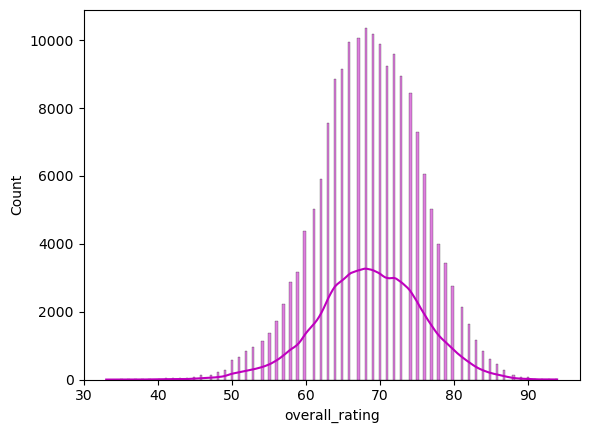

In [40]:
sns.histplot(data=df_player_info,x='overall_rating',kde=True,color='m');

This distribution shows that most of the players have a ratings between 65 and 75.

* The build up speed class count among teams:

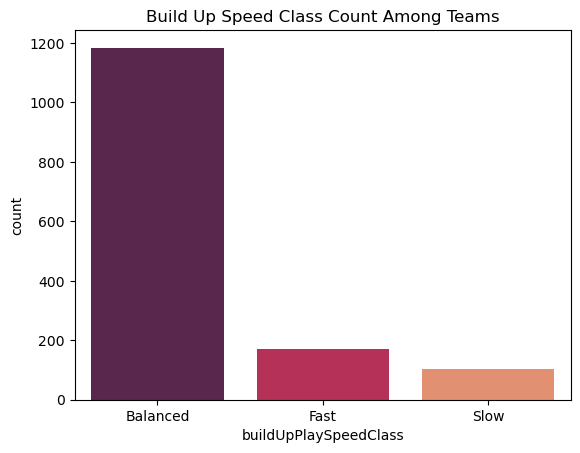

In [41]:
g=sns.countplot(data=df_team_info,x='buildUpPlaySpeedClass',palette='rocket');
g.set_title('Build Up Speed Class Count Among Teams')
plt.show()

This bar plot shows that most of the teams in the dataset have a balanced build up play speed.

* defence pressure distribution among teams:

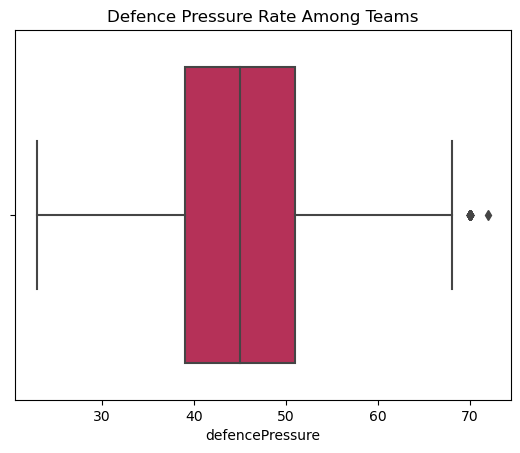

In [42]:
g=sns.boxplot(data=df_team_info,x='defencePressure',palette='rocket')
g.set_title('Defence Pressure Rate Among Teams');

The defence pressure distribution shows that 75% of teams have a defence pressure rate between 20% and 50%  and the last 25% of the teams have a defence pressure rate between 51% and 70%.

#### QUESTION ONE

* What is the biggest goal difference in a single match?

In [43]:
df_match['goal_difference']=abs(df_match['home_team_goal']-df_match['away_team_goal'])
df_match[df_match['goal_difference']==max(df_match['goal_difference'])]
# creating a new column in df_match indicated the goal difference in each match by taking the absolute value of home goals minus the away goals

,season,stage,date,name_country,name_league,team_long_name_home,team_short_name_home,team_long_name_away,team_short_name_away,home_team_goal,away_team_goal,team_fifa_api_id_home,team_fifa_api_id_away,goal_difference
13653,2010/2011,10,2010-10-24,Netherlands,Netherlands Eredivisie,PSV,PSV,Feyenoord,FEY,10,0,247,246,10


* The biggest goal difference in a single match is 10 which happened in 2010-10-24 when PSV won against Feynoord 10-0.

#### QUESTION TWO

* What is the number of unique teams for each country and which country has the biggest number of teams participated in these matches?

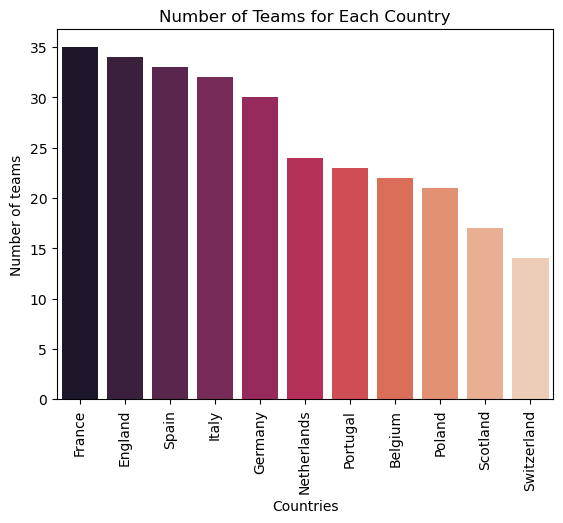

In [44]:
n_teams=[]
countries=list(df_match['name_country'].unique())
for x in countries:
    n_teams.append(df_match[df_match['name_country']==x]['team_long_name_home'].nunique())
data= {"Countries":countries,"Number of teams":n_teams}
df=pd.DataFrame(data)
df=df.sort_values(by='Number of teams',ascending=False)
g=sns.barplot(data=df,x='Countries',y='Number of teams',palette="rocket")
g.set_title('Number of Teams for Each Country')
plt.xticks(rotation=90);
#Creating a list of number of teams in each country then creating a dataframe and then sort it to become better at visualization.

* The bar chart shows that France has the maximum number of teams that participated in matches which is 35 teams.

#### QUESTION THREE

* Among the players with high attacking rate, what is the relationship between dribbling rate and overall rate?

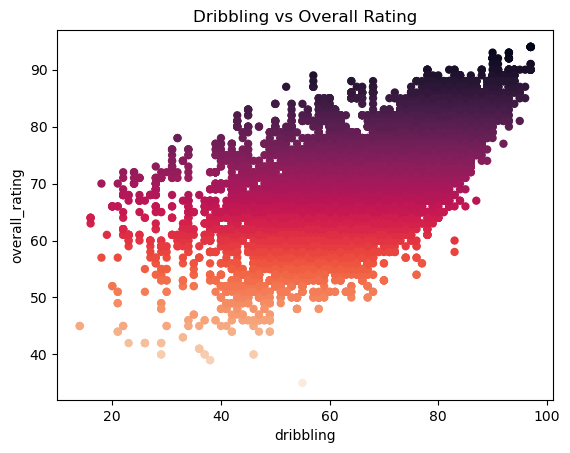

In [45]:
df_player_high_attack_rate=df_player_info[df_player_info['attacking_work_rate']=='high']
g=sns.scatterplot(data=df_player_high_attack_rate,x='dribbling',y='overall_rating',hue='overall_rating',palette='rocket_r',linewidth=0,legend=False)
g.set_title('Dribbling vs Overall Rating');

In [46]:
df_player_high_attack_rate['dribbling'].corr(df_player_high_attack_rate['overall_rating'])

0.6911285773957252

* There is a positive correlation between dribbling and overall rate for players with high attacking rate,the correlation coefficient is 0.6911.

#### QUESTION FOUR

* Do teams tend to score more goals when they play at home?

In [47]:
home_goals_mean= df_match['home_team_goal'].mean()
away_goals_mean= df_match['away_team_goal'].mean()


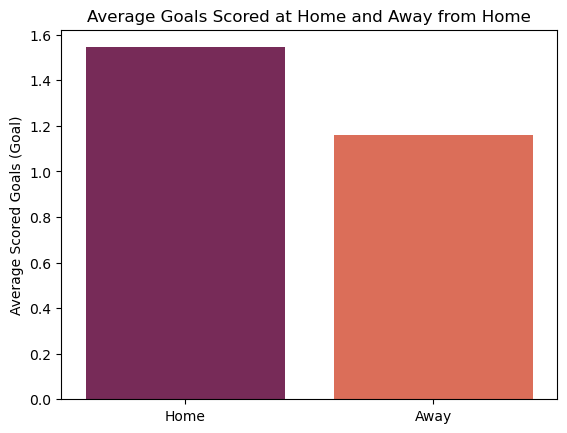

In [48]:
g=sns.barplot(x=['Home','Away'],y=[home_goals_mean,away_goals_mean],palette='rocket')
g.set_title('Average Goals Scored at Home and Away from Home')
g.set(ylabel='Average Scored Goals (Goal)');

* It seams to be that teams score more goals when they play at home.

#### QUESTION FIVE

* For each country, what is the team with the highest number of wins?

In [49]:
df_match.head(1)

,season,stage,date,name_country,name_league,team_long_name_home,team_short_name_home,team_long_name_away,team_short_name_away,home_team_goal,away_team_goal,team_fifa_api_id_home,team_fifa_api_id_away,goal_difference
0,2008/2009,1,2008-08-17,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,1,1,673,675,0


In [50]:
df_match['winning_team']=''
for index, row in df_match.iterrows():
    if row['home_team_goal'] > row['away_team_goal']:
        df_match.loc[index, 'winning_team'] = row['team_long_name_home']
    elif row['home_team_goal'] < row['away_team_goal']:
        df_match.loc[index, 'winning_team'] = row['team_long_name_away']
    else:
        df_match.loc[index, 'winning_team'] = None
# creating a new column in df_match determines the winning team in each match.

In [51]:
most_winning_team=[]
number_of_wins=[]
for x in countries:
    df=df_match[df_match['name_country']==x]
    most_winning_team.append(df['winning_team'].value_counts().idxmax())
    number_of_wins.append(df['winning_team'].value_counts()[0])
dict_most_win_team={'countries':countries,'most_winning_team':most_winning_team,'number_of_wins':number_of_wins }
df_most=pd.DataFrame(dict_most_win_team)
df_most=df_most.sort_values(by='number_of_wins',ascending=False).reset_index(drop=True)
df_most.head(3)
# creating the most_df data frame which contains the country, the most winning team and the number of wins for that team

,countries,most_winning_team,number_of_wins
0,Spain,FC Barcelona,234
1,Scotland,Celtic,218
2,Germany,FC Bayern Munich,193


In [52]:
countries_sorted=list(df_most['countries'])
most_winning_teams_sorted=list(df_most['most_winning_team'])
df_most['country_team_pair']=list(zip(countries_sorted,most_winning_teams_sorted))
# creating a new column in dF_most adding the country and the team to a tuple

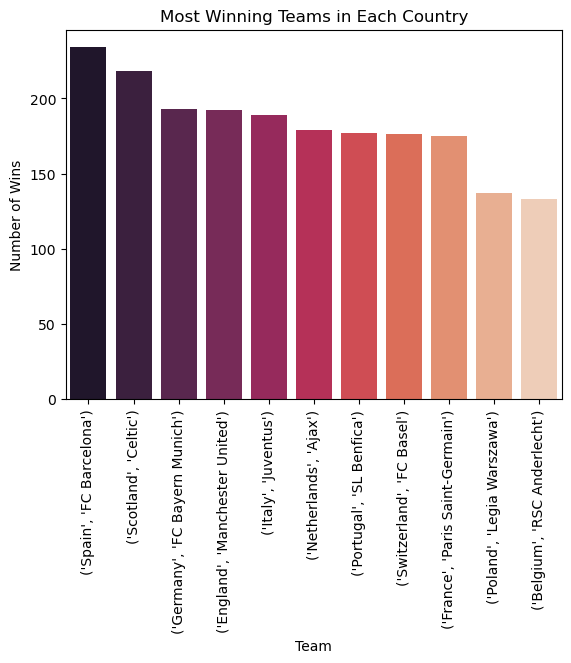

In [53]:
g=sns.barplot(data=df_most,x='country_team_pair',y='number_of_wins',palette='rocket')
plt.xticks(rotation=90);
g.set_title('Most Winning Teams in Each Country')
g.set(ylabel='Number of Wins',xlabel='Team')
plt.show()
# Visualize the teams with the most wins and the number of wins for each team.

* The results show the most winning team in each country, in Spain its FC Barcelona and in Italy is Juventus and so on.
* They also show that FC Barcelons is the team with the most wins in this period with 234 wins.

### Conclusion

* I first chose the football database, then understood the data for each table separately, and each attribute of a table separately.
* Then I imported the required libraries and packages to perform the data analysis.
* After that, I prepared the data for analysis, as I reduced the number of tables from 8 to 3 by merging the tables with each other using primary keys.
* After that, I examined the data frames, cleaned them from missing values, and converted some types of data from one type to another, so that the analysis operations become logical and correct. Then I examined some summery statistics related to each table.
* After that, I started my exploratory data analysis on the existing tables and drew some conclusions:

1- **Most of the players have a ratings between 65 and 75.**

2- **Most of the teams in the dataset have a balanced build up play speed.**

3- **75% of teams have a defence pressure rate between 20% and 50% and the last 25% of the teams have a defence pressure rate between 51% and 70%.**

* And for the questions the results are:

1- **The biggest goal difference in a single match is 10 which happened in 2010-10-24 when PSV won against Feynoord 10-0.**

2- **France has the maximum number of teams that participated in matches which is 35 teams.**

3-**There is a positive correlation between dribbling and overall rate for players with high attacking rate,the correlation coefficient is 0.6911.**

4-**It seams to be that teams score more goals when they play at home.**

5-**The most winning team in each country, in Spain its FC Barcelona, in Italy is Juventus, in England is Manchester United, in Scotland its Celtic, in Germany its FC Bayern Munich, in Netherlands its Ajax, in Portugal its SL Benfica, in Switzerland its FC Basel, in France its Paris Saint-Germain, in Poland its Legia Warszawa, and in Belgium its RSC Anderlecht. FC Barcelons is the team with the most wins in this period with 234 wins.**

* The limistions: I encountered some difficulties in dealing with some tables, as they contained a huge number of columns, the interpretation of which requires a long time and great effort.


